# Explore here

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score  

**Importing Data**

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
df = pd.read_csv(url)
#df.to_csv('../data/raw/bank-marketing-campaign-data.csv', index=False)

In [211]:
#df = pd.read_csv('../data/raw/bank-marketing-campaign-data.csv')
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


**Classes**

In [9]:
class PreProcessing():
    def __init__(self, df):
        self.df = df
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def feature_encoding(self, one_hot_encoding : bool = False):
        if one_hot_encoding:
          self.df = pd.get_dummies(self.df, columns=self.df.select_dtypes(include=['object']).columns, drop_first=True)
        else:
          for cat_col in list(self.df.select_dtypes(include=['object']).columns):
            self.df[cat_col] = pd.factorize(self.df[cat_col])[0]

    def feature_transform(self, std:bool, norm:bool=False):
        if std == True:
            scaler_std = StandardScaler()
            self.df = pd.DataFrame(scaler_std.fit_transform(self.df), columns=self.df.columns)
        if norm == True:
            scaler_norm = MinMaxScaler()
            self.df = pd.DataFrame(scaler_norm.fit_transform(self.df), columns=self.df.columns)

    def data_split(self, target):
        self.X = self.df.drop(target, axis=1)
        self.y = self.df[target]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

    def get_output(self):
        return self.X_train, self.y_train, self.X_test, self.y_test

**Data Exploration and Cleaning**

In [213]:
df.shape

(3140, 108)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [215]:
#Checking for duplicates
df.duplicated().sum()

0

In [216]:
#Checking for null values
null_values = df.isnull().sum() 
np.where(null_values > 0)

(array([], dtype=int64),)

In [217]:
for i in df.columns:
    print(i)

fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
Percent of adults completing some college 

In [4]:
#Renaming columns
df.rename(columns={'19-Oct': '10-19'}, inplace=True)

**Descriptive statistics of categorical variables**

In [171]:
cat_variables = df.describe(include=['O'])
cat_variables

,COUNTY_NAME,STATE_NAME
count,3140,3140
unique,1841,51
top,Washington,Texas
freq,31,254


**Plot of numerical variables**

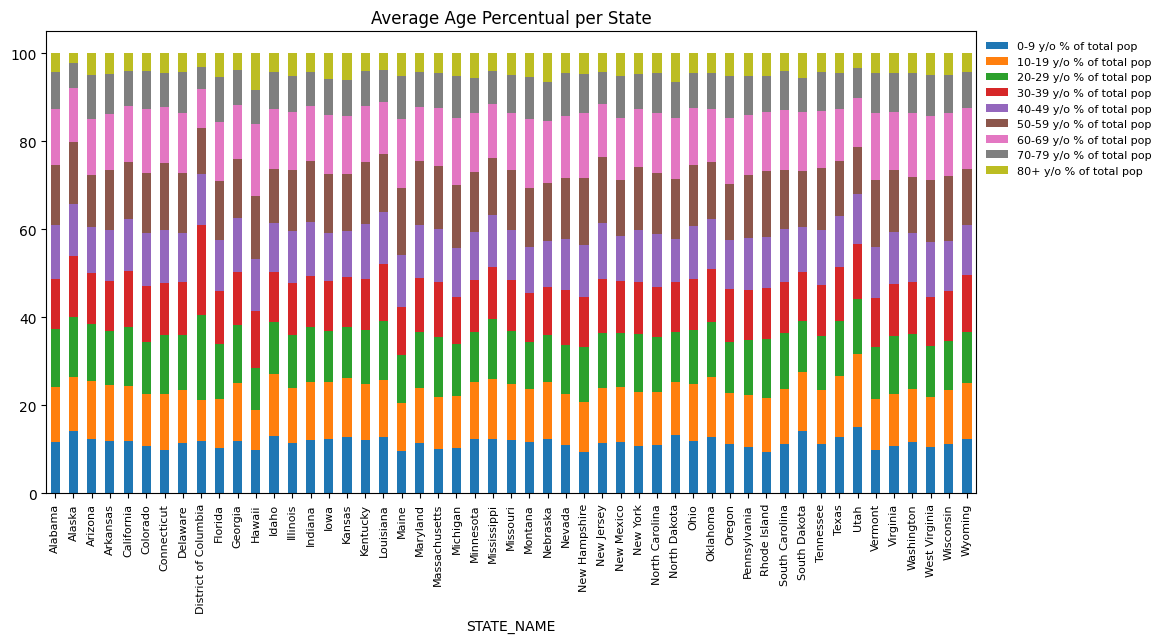

In [172]:
# AGE BINS
#Getting columns with percentage age bins
age = [age_bin for age_bin in df.columns if 'y/o % of total pop' in age_bin]
#Plot age bins per state
plt.figure(figsize=(12,6))
ax = plt.subplot()
df.groupby('STATE_NAME')[age].mean().plot(kind='bar', stacked=True, ax=ax)
plt.xticks(fontsize=8)
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=8, frameon=False)
plt.title('Average Age Percentual per State')
plt.show()

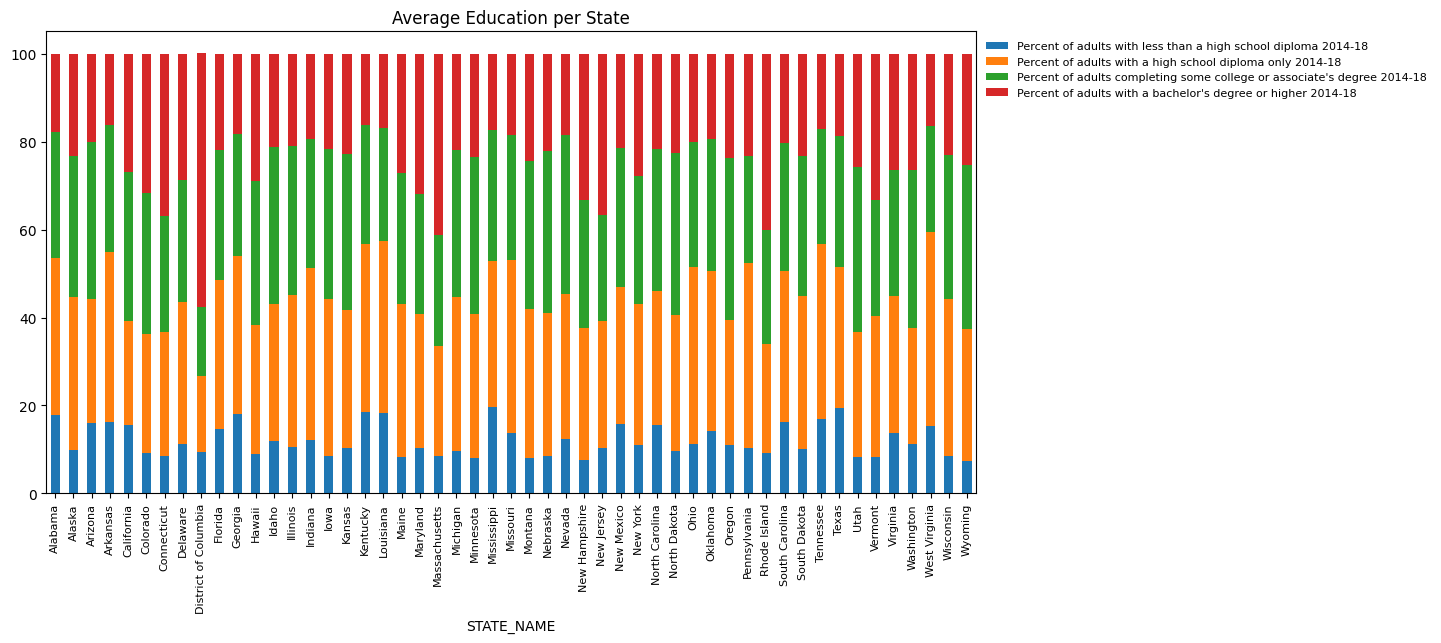

In [173]:
# EDUCATION
plt.figure(figsize=(12,6))
ax=plt.subplot()
df.groupby('STATE_NAME')[['Percent of adults with less than a high school diploma 2014-18',
                          'Percent of adults with a high school diploma only 2014-18',
                          "Percent of adults completing some college or associate's degree 2014-18",
                          "Percent of adults with a bachelor's degree or higher 2014-18"]].mean().plot(kind='bar', stacked=True, ax=ax)
plt.xticks(fontsize=8)
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=8, frameon=False)
plt.title('Average Education per State')
plt.show()

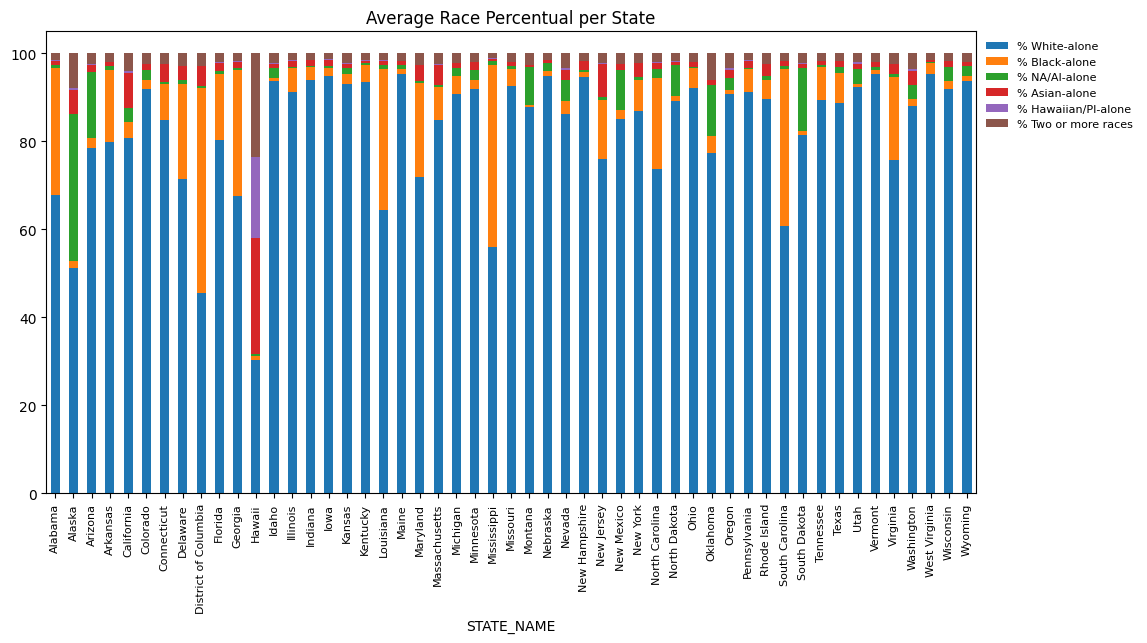

In [174]:
# RACE
#Getting columns with percentages of race
race = [r for r in df.columns if 'alone' in r and '%' in r]
race.append("% Two or more races")
#Plot race percentage per state
plt.figure(figsize=(12,6))
ax=plt.subplot()
df.groupby('STATE_NAME')[race].mean().plot(kind='bar', stacked=True, ax=ax)
plt.xticks(fontsize=8)
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=8, frameon=False)
plt.title('Average Race Percentual per State')
plt.show()

**Pre Processing**

In [5]:
dp = PreProcessing(df)

In [6]:
dp.feature_encoding(True)
dp.feature_transform(std=True)
dp.data_split('Heart disease_number')

In [7]:
X_train, y_train, X_test, y_test = dp.get_output()

In [8]:
print('Train data:\nX:', X_train.shape, 'y:', y_train.shape)
print('Test data:\nX:', X_test.shape, 'y:', y_test.shape)

Train data:
X: (2512, 1995) y: (2512,)
Test data:
X: (628, 1995) y: (628,)


**Linear Regression Model**

In [10]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

In [14]:
lr_rmse_train = mean_squared_error(y_train, y_train_pred)**(0.5)
lr_mae_train = mean_absolute_error(y_train, y_train_pred)
lr_mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
lr_r2_train = r2_score(y_train, y_train_pred)
print(f"Train results:\n RMSE: {lr_rmse_train}\n MAE: {lr_mae_train}\n MAPE: {lr_mape_train}\n R2: {lr_r2_train}")
print()
lr_rmse_test = mean_squared_error(y_test, y_test_pred)**(0.5)
lr_mae_test = mean_absolute_error(y_test, y_test_pred)
lr_mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
lr_r2_test = r2_score(y_test, y_test_pred)
print(f"Test results:\n RMSE: {lr_rmse_test}\n MAE: {lr_mae_test}\n MAPE: {lr_mape_test}\n R2: {lr_r2_test}")

Train results:
 RMSE: 0.008569823092499035
 MAE: 0.004213051875252526
 MAPE: 0.05454620496902674
 R2: 0.9999366344442542

Test results:
 RMSE: 1005637174299.5735
 MAE: 441253107794.84283
 MAPE: 6463886470286.672
 R2: -2.816499493678584e+24


**Regularized Linear Regression Lasso Model**

In [20]:
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

Lasso()

In [21]:
y_lasso_train_pred = model_lr.predict(X_train)
y_lasso_test_pred = model_lr.predict(X_test)

In [22]:
lasso_rmse_train = mean_squared_error(y_train, y_lasso_train_pred)**(0.5)
lasso_mae_train = mean_absolute_error(y_train, y_lasso_train_pred)
lasso_mape_train = mean_absolute_percentage_error(y_train, y_lasso_train_pred)
lasso_r2_train = r2_score(y_train, y_lasso_train_pred)
print(f"Train results:\n RMSE: {lasso_rmse_train}\n MAE: {lasso_mae_train}\n MAPE: {lasso_mape_train}\n R2: {lasso_r2_train}")
print()
lasso_rmse_test = mean_squared_error(y_test, y_lasso_test_pred)**(0.5)
lasso_mae_test = mean_absolute_error(y_test, y_lasso_test_pred)
lasso_mape_test = mean_absolute_percentage_error(y_test, y_lasso_test_pred)
lasso_r2_test = r2_score(y_test, y_lasso_test_pred)
print(f"Test results:\n RMSE: {lasso_rmse_test}\n MAE: {lasso_mae_test}\n MAPE: {lasso_mape_test}\n R2: {lasso_r2_test}")

Train results:
 RMSE: 0.008569823092499035
 MAE: 0.004213051875252526
 MAPE: 0.05454620496902674
 R2: 0.9999366344442542

Test results:
 RMSE: 1005637174299.5735
 MAE: 441253107794.84283
 MAPE: 6463886470286.672
 R2: -2.816499493678584e+24


In [ ]:
dump(model_lasso, open("../models/reg_linear_regression_lasso.sav", "wb"))